In [9]:
# Importando PyTorch
import torch

# Introdução ao PyTorch

## O que é PyTorch?
PyTorch é uma biblioteca de aprendizado profundo de código aberto desenvolvida pelo Facebook's AI Research lab (FAIR). Ela é amplamente utilizada para tarefas de visão computacional e processamento de linguagem natural.

### História e contexto
PyTorch foi lançado em janeiro de 2017. Ele é baseado na biblioteca Torch, que é uma estrutura de aprendizado de máquina em Lua. PyTorch é conhecido por sua facilidade de uso e integração com Python, o que o torna popular entre pesquisadores e engenheiros.

### Comparação com outras bibliotecas
- **TensorFlow**: Desenvolvido pelo Google, TensorFlow é uma das bibliotecas de aprendizado profundo mais populares. Enquanto TensorFlow é conhecido por sua escalabilidade e produção, PyTorch é elogiado por sua facilidade de uso e flexibilidade.
- **NumPy**: NumPy é uma biblioteca fundamental para computação científica em Python. PyTorch usa tensores, que são similares aos arrays do NumPy, mas com suporte para computação em GPU.

## O que são tensores?
Tensores são a estrutura de dados fundamental em PyTorch. Eles são similares aos arrays do NumPy, mas com suporte para computação em GPU.

Tensores 1D, 2D, 3D, etc.
- 1D: Vetores
- 2D: Matrizes
- 3D: Matrizes tridimensionais (cubos de dados)
- ND: Tensores de N dimensões

In [10]:
# Tensor 1D
tensor_1d = torch.tensor([1, 2, 3, 4])
print(tensor_1d)

tensor([1, 2, 3, 4])


In [11]:
# Tensor 2D
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor_2d)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [12]:
# Tensor 3D
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(tensor_3d)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


### Tipos de dados
Os tensores em PyTorch suportam vários tipos de dados, como inteiros e floats. O tipo de dado pode ser especificado durante a criação do tensor.

In [13]:
# Criação de um tensor de inteiros
tensor_int = torch.tensor([1, 2, 3], dtype=torch.int32)
print(tensor_int)

tensor([1, 2, 3], dtype=torch.int32)


In [14]:
# Criação de um tensor de floats
tensor_float = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
print(tensor_float)

tensor([1., 2., 3.])


## Propriedade requires_grad
A propriedade `requires_grad` em PyTorch é fundamental para a construção e treinamento de redes neurais, pois permite calcular automaticamente os gradientes das operações. Quando `requires_grad` é definido como `True` em um tensor, todas as operações feitas nesse tensor serão rastreadas para a diferenciação automática.

### Autograd e Grafos Computacionais

Autograd é um componente essencial em frameworks de deep learning como PyTorch, que permite a diferenciação automática de tensores. Este mecanismo é fundamental para a otimização dos modelos de aprendizado de máquina, pois permite calcular gradientes de forma eficiente, necessária para o ajuste dos parâmetros do modelo durante o treinamento.

#### Grafos Computacionais

Para entender o funcionamento do autograd, é importante compreender os grafos computacionais. Um grafo computacional é uma representação gráfica de uma sequência de operações matemáticas, onde:

- **Nós (nodes)** representam operações matemáticas ou variáveis.
- **Arestas (edges)** representam os fluxos de dados (tensores) entre as operações.

![alt text](https://miro.medium.com/max/908/1*ahiviCqq6B0R_XWBmgvHkA.png "Grafo Computacional")

Durante a construção de um modelo, as operações realizadas nos tensores criam um grafo computacional dinâmico, também conhecido como *Dynamic Computation Graph*. Esse grafo é dinâmico porque é construído à medida que as operações são executadas, permitindo flexibilidade e facilidade na criação e modificação de modelos.

#### Propagação para Frente (Forward Pass)

Durante a propagação para frente (forward pass), os tensores são passados através das operações definidas no grafo computacional, produzindo uma saída. Este processo é usado para calcular a perda (loss) do modelo.

#### Propagação para Trás (Backward Pass)

A propagação para trás (backward pass) é o processo de calcular os gradientes dos tensores em relação à perda, utilizando a regra da cadeia. O autograd facilita essa tarefa, realizando automaticamente a diferenciação reversa ao longo do grafo computacional. Os passos são:

1. **Calcula a perda**: A partir das saídas do forward pass.
2. **Calcula os gradientes**: Utilizando a diferenciação automática.
3. **Atualiza os parâmetros**: Os gradientes calculados são usados para ajustar os parâmetros do modelo através de otimização, como o gradiente descendente.

### Criando Tensores com `requires_grad`

Vamos criar tensores com a propriedade `requires_grad` definida como `True`:

In [15]:
# Tensor com requires_grad
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


### Realizando Operações com Tensores que Têm `requires_grad`

Quando realizamos operações com tensores que têm `requires_grad=True`, o PyTorch cria uma tape (fita) para rastrear todas as operações. Vamos ver um exemplo:

In [16]:
# Realiza uma operação com o tensor x
y = x ** 2

# Mais uma operação
z = y.sum()

print(z)

tensor(14., grad_fn=<SumBackward0>)


### Calculando Gradientes

Para calcular os gradientes, usamos o método `backward()`. Isso calcula o gradiente da função de perda em relação a todos os tensores que têm `requires_grad=True`.

Os gradientes armazenados em `x.grad` representam a derivada da soma `z` em relação a `x`. Como `z` é a soma dos elementos de `y` e `y = x ** 2`, a derivada de `z` em relação a `x` é `2 * x`.

In [17]:
# Calcula os gradientes
z.backward()

# Imprime os gradientes armazenados em x.grad
print(x.grad)

tensor([2., 4., 6.])


### Desativando o Rastreamento de Gradientes

Em algumas situações, não queremos rastrear as operações, como durante a inferência do modelo. Podemos desativar temporariamente o rastreamento de gradientes usando `torch.no_grad()` ou `detach()`. Vamos ver como:

In [18]:
# Desativando o rastreamento de gradientes temporariamente
with torch.no_grad():
    y = x * 2
    print(y.requires_grad)  # False, pois o rastreamento está desativado

# Criando um novo tensor sem rastreamento de gradientes
x_detached = x.detach()
print(x_detached.requires_grad)  # False, pois o tensor foi separado da tape de computação

False
False


### Verificando se um Tensor Requer Gradiente

Podemos verificar se um tensor requer gradiente usando a propriedade `requires_grad`:

In [19]:
print(x.requires_grad)  # True, pois x foi criado com requires_grad=True
print(x_detached.requires_grad)  # False, pois x_detached foi separado da tape de computação

True
False


## Funções de Criação de Tensores
PyTorch fornece várias funções utilitárias para criar tensores de forma eficiente.

- `torch.zeros`: Cria um tensor preenchido com zeros.
- `torch.zeros_like`: Cria um tensor preenchido com zeros, com as mesmas dimensões de um tensor dado.
- `torch.ones`: Cria um tensor preenchido com uns.
- `torch.ones_like`: Cria um tensor preenchido com uns, com as mesmas dimensões de um tensor dado.
- `torch.linspace`: Cria um tensor com valores linearmente espaçados entre dois pontos.
- `torch.arange`: Cria um tensor com valores em uma faixa específica com um passo definido.

In [20]:
# Criação de tensores de zeros
tensor_zeros = torch.zeros(3, 3)
print(tensor_zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [21]:
# Criação de tensores de zeros_like
tensor_zeros_like = torch.zeros_like(tensor_2d)
print(tensor_zeros_like)

tensor([[0, 0, 0],
        [0, 0, 0]])


In [22]:
# Criação de tensores de uns
tensor_ones = torch.ones(2, 2)
print(tensor_ones)

tensor([[1., 1.],
        [1., 1.]])


In [23]:
# Criação de tensores de ones_like
tensor_ones_like = torch.ones_like(tensor_2d)
print(tensor_ones_like)

tensor([[1, 1, 1],
        [1, 1, 1]])


In [24]:
# Linspace
tensor_linspace = torch.linspace(0, 10, steps=5)
print(tensor_linspace)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])


In [25]:
# Arange
tensor_arange = torch.arange(0, 10, step=2)
print(tensor_arange)

tensor([0, 2, 4, 6, 8])


## Indexação e Fatiamento
A indexação e o fatiamento em PyTorch são similares ao NumPy, permitindo acessar e modificar partes específicas de um tensor.

In [26]:
# Tensor exemplo
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Indexação
print(tensor[0, :])  # Primeira linha
print(tensor[:, 1])  # Segunda coluna

# Fatiamento
print(tensor[1:, 1:])  # Subtensor a partir da segunda linha e segunda coluna

tensor([1, 2, 3])
tensor([2, 5, 8])
tensor([[5, 6],
        [8, 9]])


## Operações básicas com tensores
PyTorch suporta várias operações básicas com tensores, como adição, multiplicação, subtração e divisão.

In [27]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Adição
print("+", a + b)

# Multiplicação
print("*", a * b)

# Subtração
print("-", a - b)

# Divisão
print("/", a / b)

+ tensor([5, 7, 9])
* tensor([ 4, 10, 18])
- tensor([-3, -3, -3])
/ tensor([0.2500, 0.4000, 0.5000])


## Manipulando formato (shape)

In [28]:
tensor = torch.arange(12).reshape(4, 3)
print(tensor)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


### View
A função view em PyTorch permite alterar a forma (shape) de um tensor sem alterar seus dados subjacentes. É semelhante ao método reshape do NumPy.

In [29]:
# View
tensor_reshaped = tensor.view(6, 2)
print(tensor_reshaped)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])


### Transpose
A função transpose retorna um novo tensor com as dimensões transpostas.

In [30]:
# Transpose
tensor_transposed = tensor.t()
print(tensor_transposed)

tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])


### Flatten
A função flatten retorna um tensor 1D contendo todos os elementos do tensor original

In [31]:
# Flatten
tensor_flattened = tensor.flatten()
print(tensor_flattened)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [32]:
# Reshape
tensor_reshaped = tensor.reshape(1, 2, 6, 1)
print(tensor_reshaped)
print(tensor_reshaped.shape)

tensor([[[[ 0],
          [ 1],
          [ 2],
          [ 3],
          [ 4],
          [ 5]],

         [[ 6],
          [ 7],
          [ 8],
          [ 9],
          [10],
          [11]]]])
torch.Size([1, 2, 6, 1])


### Squeeze e Unsqueeze
- `squeeze`: Remove dimensões de tamanho 1 de um tensor.
- `unsqueeze`: Adiciona uma dimensão de tamanho 1 em um tensor.

In [33]:
# Squeeze
tensor_squeezed = tensor_reshaped.squeeze()
print(tensor_squeezed)
print(tensor_squeezed.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])


In [34]:
# Unsqueeze
tensor_unsqueezed = tensor_squeezed.unsqueeze(dim=0)
print(tensor_unsqueezed)
print(tensor_unsqueezed.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]]])
torch.Size([1, 2, 6])


## Broadcasting
O broadcasting é uma técnica que permite que tensores de diferentes formas sejam utilizados juntos em operações aritméticas. Em vez de copiar dados, o PyTorch ajusta os tensores de forma automática para que tenham formas compatíveis.

### Adição de um Escalar

Quando adicionamos um escalar a um tensor, o escalar é automaticamente expandido para a forma do tensor:

In [35]:
# Cria um tensor 2x3
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Adiciona um escalar
scalar = 10

# Broadcasting para adicionar o escalar a cada elemento do tensor
result = tensor + scalar
print(result)

tensor([[11, 12, 13],
        [14, 15, 16]])


### Adição de Tensores com Diferentes Dimensões

Vamos adicionar um tensor 2x3 com um tensor 1x3. Neste caso, o tensor 1x3 será expandido (broadcasted) para uma forma 2x3:

In [36]:
# Cria um tensor 2x3
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Cria um tensor 1x3
tensor_b = torch.tensor([10, 20, 30])

# Broadcasting para adicionar tensores de diferentes formas
result = tensor_a + tensor_b
print(result)

tensor([[11, 22, 33],
        [14, 25, 36]])


### Regras de Broadcasting

Para que o broadcasting funcione, os tensores devem seguir algumas regras:

1. **Compatibilidade de Dimensões**: As dimensões dos tensores devem ser compatíveis. Duas dimensões são compatíveis se forem iguais ou se uma delas for 1.
2. **Expansão Automática**: Se uma dimensão de um tensor for 1, ela será expandida para corresponder à dimensão do outro tensor.

No exemplo a seguir, o tensor `tensor_c` de forma 2x1 é expandido para 2x3, e o tensor `tensor_d` de forma 1x3 é expandido para 2x3. O resultado é um tensor 2x3 onde cada elemento é o produto dos elementos correspondentes.

In [37]:
# Cria um tensor 2x1
tensor_c = torch.tensor([[1], [2]])

# Cria um tensor 1x3
tensor_d = torch.tensor([10, 20, 30])

# Broadcasting para multiplicar tensores de diferentes formas
result = tensor_c * tensor_d
print(result)

tensor([[10, 20, 30],
        [20, 40, 60]])


## Operações de Redução em PyTorch

As operações de redução são usadas para reduzir as dimensões de um tensor, aplicando operações como soma, média, mínimo e máximo. Essas operações são fundamentais em várias aplicações de machine learning e deep learning.

In [38]:
# Cria um tensor 2x3
tensor = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print("Tensor original:\n", tensor)
print(tensor.shape)

Tensor original:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


### Soma de Todos os Elementos

A função `torch.sum` calcula a soma de todos os elementos do tensor:

In [39]:
# Soma de todos os elementos do tensor
sum_all = torch.sum(tensor)
print("Soma de todos os elementos:", sum_all.item())

Soma de todos os elementos: 21.0


### Soma ao Longo de um Eixo

Podemos calcular a soma ao longo de um eixo específico, usando o parâmetro `dim`:

In [40]:
# Soma ao longo do eixo 0 (linhas)
sum_dim0 = torch.sum(tensor, dim=0)
print("Soma ao longo do eixo 0 (linhas):", sum_dim0)
print(sum_dim0.shape)

Soma ao longo do eixo 0 (linhas): tensor([5., 7., 9.])
torch.Size([3])


In [41]:
# Soma ao longo do eixo 1 (colunas)
sum_dim1 = torch.sum(tensor, dim=1)
print("Soma ao longo do eixo 1 (colunas):", sum_dim1)
print(sum_dim1.shape)

Soma ao longo do eixo 1 (colunas): tensor([ 6., 15.])
torch.Size([2])


### Média dos Elementos

A função `torch.mean` calcula a média dos elementos do tensor:

In [42]:
# Média de todos os elementos do tensor
mean_all = torch.mean(tensor)
print("Média de todos os elementos:", mean_all.item())

Média de todos os elementos: 3.5


In [43]:
# Média ao longo do eixo 0 (linhas)
mean_dim0 = torch.mean(tensor, dim=0)
print("Média ao longo do eixo 0 (linhas):", mean_dim0)
print(mean_dim0.shape)

Média ao longo do eixo 0 (linhas): tensor([2.5000, 3.5000, 4.5000])
torch.Size([3])


In [44]:
# Média ao longo do eixo 1 (colunas)
mean_dim1 = torch.mean(tensor, dim=1)
print("Média ao longo do eixo 1 (colunas):", mean_dim1)
print(mean_dim1.shape)

Média ao longo do eixo 1 (colunas): tensor([2., 5.])
torch.Size([2])


### Valor Mínimo e Máximo

Podemos encontrar o valor mínimo e máximo de um tensor usando `torch.min` e `torch.max`:

In [45]:
# Valor mínimo de todos os elementos do tensor
min_all = torch.min(tensor)
print("Valor mínimo de todos os elementos:", min_all)
print()

# Valor máximo de todos os elementos do tensor
max_all = torch.max(tensor)
print("Valor máximo de todos os elementos:", max_all)
print()

# Valor mínimo ao longo do eixo 0 (linhas)
min_dim0, min_indices_dim0 = torch.min(tensor, dim=0)
print("Valor mínimo ao longo do eixo 0 (linhas):", min_dim0)
print("Índices dos valores mínimos ao longo do eixo 0 (linhas):", min_indices_dim0)
print()

# Valor máximo ao longo do eixo 1 (colunas)
max_dim1, max_indices_dim1 = torch.max(tensor, dim=1)
print("Valor máximo ao longo do eixo 1 (colunas):", max_dim1)
print("Índices dos valores máximos ao longo do eixo 1 (colunas):", max_indices_dim1)

Valor mínimo de todos os elementos: tensor(1.)

Valor máximo de todos os elementos: tensor(6.)

Valor mínimo ao longo do eixo 0 (linhas): tensor([1., 2., 3.])
Índices dos valores mínimos ao longo do eixo 0 (linhas): tensor([0, 0, 0])

Valor máximo ao longo do eixo 1 (colunas): tensor([3., 6.])
Índices dos valores máximos ao longo do eixo 1 (colunas): tensor([2, 2])


### Produto dos Elementos

A função `torch.prod` calcula o produto de todos os elementos do tensor:

In [46]:
# Produto de todos os elementos do tensor
prod_all = torch.prod(tensor)
print("Produto de todos os elementos:", prod_all)
print()

# Produto ao longo do eixo 0 (linhas)
prod_dim0 = torch.prod(tensor, dim=0)
print("Produto ao longo do eixo 0 (linhas):", prod_dim0)
print()

# Produto ao longo do eixo 1 (colunas)
prod_dim1 = torch.prod(tensor, dim=1)
print("Produto ao longo do eixo 1 (colunas):", prod_dim1)

Produto de todos os elementos: tensor(720.)

Produto ao longo do eixo 0 (linhas): tensor([ 4., 10., 18.])

Produto ao longo do eixo 1 (colunas): tensor([  6., 120.])


## Exercícios - PyTorch Básico

### Exercício 1: Criação de Tensores

1. Crie um tensor 1D com os valores de 1 a 10.
2. Crie um tensor 2D de forma (3, 3) com valores aleatórios.
3. Crie um tensor 3D de forma (2, 3, 4) com todos os valores iguais a 1.
4. Crie um tensor de zeros com as mesmas dimensões do tensor 2D criado no exercício 2.
5. Crie um tensor de uns com as mesmas dimensões do tensor 3D criado no exercício 3.

In [53]:
# @title 1) Crie um tensor 1D com os valores de 1 a 10.

tensor_1d = torch.arange(1, 11)
print(tensor_1d)


tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [54]:
# @title 2) Crie um tensor 2D de forma (3, 3) com valores aleatórios.

tensor_2d = torch.rand(3, 3)
print(tensor_2d)

tensor([[0.0737, 0.0408, 0.4899],
        [0.9756, 0.9279, 0.6569],
        [0.7703, 0.4418, 0.8821]])


In [55]:
# @title 3) Crie um tensor 3D de forma (2, 3, 4) com todos os valores iguais a 1.

tensor_3d = torch.ones(2, 3, 4)
print(tensor_3d)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [56]:
# @title 4) Crie um tensor de zeros com as mesmas dimensões do tensor 2D criado no exercício 2.

tensor_zeros = torch.zeros_like(tensor_2d)
print(tensor_zeros)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [57]:
# @title 5) Crie um tensor de uns com as mesmas dimensões do tensor 3D criado no exercício

tensor_ones = torch.ones_like(tensor_3d)
print(tensor_ones)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


### Exercício 2: Manipulação de Tensores

1. Dado o tensor `a = torch.tensor([[1, 2], [3, 4], [5, 6]])`, obtenha a primeira coluna.
2. Dado o tensor `b = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])`, obtenha o subtensor `[[7, 8, 9], [10, 11, 12]]`.
3. Dado o tensor `c = torch.tensor([1, 2, 3, 4, 5, 6])`, mude sua forma para (2, 3).
4. Dado o tensor `d = torch.tensor([1, 2, 3, 4, 5, 6])`, adicione uma dimensão extra para que ele se torne de forma (1, 6).

In [60]:
# @title 1) Dado o tensor a = torch.tensor([[1, 2], [3, 4], [5, 6]]), obtenha a primeira coluna.

a = torch.tensor([[1, 2], [3, 4], [5, 6]])
primeira_coluna = a[:, 0]
print(primeira_coluna)

tensor([1, 3, 5])


In [61]:
# @title 2) Dado o tensor b = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]), obtenha o subtensor [[7, 8, 9], [10, 11, 12]].

b = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
subtensor = b[1, :, :]
print(subtensor)

tensor([[ 7,  8,  9],
        [10, 11, 12]])


In [62]:
# @title 3) Dado o tensor c = torch.tensor([1, 2, 3, 4, 5, 6]), mude sua forma para (2, 3).

c = torch.tensor([1, 2, 3, 4, 5, 6])
c_reshaped = c.reshape(2, 3)
print(c_reshaped)


tensor([[1, 2, 3],
        [4, 5, 6]])


In [64]:
# @title 4) Dado o tensor d = torch.tensor([1, 2, 3, 4, 5, 6]), adicione uma dimensão extra para que ele se torne de forma (1, 6).

d = torch.tensor([1, 2, 3, 4, 5, 6])
d_reshaped = d.reshape(1, 6)
print(d_reshaped)

tensor([[1, 2, 3, 4, 5, 6]])


### Exercício 3: Funções de Criação de Tensores

1. Crie um tensor contendo valores de 0 a 1, espaçados igualmente em 5 passos.
2. Crie um tensor contendo valores de 0 a 10, com um passo de 2.
3. Crie um tensor de forma (3, 3) com valores aleatórios entre 0 e 10.
4. Crie um tensor correspondente a uma imagem em escala de cinza de dimensões 128x128 com valores aleatórios entre 0 e 255.
5. Crie um tensor correspondente a uma imagem em RGB de dimensões 128x128 com valores aleatórios entre 0 e 255.

In [65]:
# @title 1) Crie um tensor contendo valores de 0 a 1, espaçados igualmente em 5 passos.

tensor_linspace = torch.linspace(0, 1, steps=5)
print(tensor_linspace)


tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [66]:
# @title 2) Crie um tensor contendo valores de 0 a 10, com um passo de 2.

tensor_arange = torch.arange(0, 11, step=2)
print(tensor_arange)


tensor([ 0,  2,  4,  6,  8, 10])


In [72]:
# @title 3) Crie um tensor de forma (3, 3) com valores aleatórios entre 0 e 10.

tensor_rand = torch.rand(3, 3) * 10
print(tensor_rand)

# usando randint
tensor_randint = torch.randint(low=0, high=11, size=(3, 3))
print("\nUsando randint: \n",tensor_randint)

tensor([[1.6463, 8.3993, 9.7983],
        [4.4778, 4.3008, 4.6787],
        [7.2193, 6.0930, 5.2296]])

Usando randint: 
 tensor([[2, 7, 6],
        [3, 0, 9],
        [3, 8, 4]])


In [81]:
# @title 4) Crie um tensor correspondente a uma imagem em escala de cinza de dimensões 128x128 com valores aleatórios entre 0 e 255.

# usando randint
tensor_randint_cinza = torch.randint(low=0, high=256, size=(128, 128))
print("\nUsando randint: \n",tensor_randint_cinza)



Usando randint: 
 tensor([[155, 161, 241,  ..., 155,   5, 248],
        [  3, 174,  11,  ...,  92,  75,  83],
        [ 54,  18,  19,  ..., 196, 218,  57],
        ...,
        [225, 181,  26,  ...,  46, 157, 243],
        [ 72, 204,  96,  ..., 206,  36, 113],
        [  8, 144,  78,  ...,  16,  39, 100]])


In [80]:
# Escrevendo em forma de tabela
import pandas as pd

df = pd.DataFrame(tensor_randint_cinza.numpy())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,46,125,130,32,151,218,8,48,104,205,...,71,72,158,9,222,219,96,157,47,221
1,175,12,148,149,172,219,77,215,15,222,...,153,196,32,210,16,177,191,165,130,50
2,157,139,165,245,64,207,17,206,95,79,...,202,168,199,72,25,45,244,237,83,215
3,189,131,60,4,16,241,200,170,8,85,...,137,14,255,168,228,80,201,147,184,202
4,227,126,129,241,45,244,4,142,249,18,...,0,148,242,218,220,27,38,215,79,99


In [84]:
# @title 5) Crie um tensor correspondente a uma imagem em RGB de dimensões 128x128 com valores aleatórios entre 0 e 255.

tensor_randint_rgb = torch.randint(low=0, high=256, size=(128, 128, 3))
print("\nUsando randint: \n",tensor_randint_rgb)



Usando randint: 
 tensor([[[247, 211,  55],
         [195, 208,  57],
         [215,  26, 186],
         ...,
         [125,  87, 198],
         [213, 100,  61],
         [173, 125, 247]],

        [[118, 210,  36],
         [186, 138, 113],
         [ 12, 229,  50],
         ...,
         [ 74,  99,  14],
         [241, 207, 117],
         [220,  53,   3]],

        [[189, 104,  32],
         [160, 255, 191],
         [124, 216, 156],
         ...,
         [189, 152, 216],
         [ 79,   8,  82],
         [201,   6,  32]],

        ...,

        [[136, 234,  93],
         [136,  78,  62],
         [ 51, 121, 143],
         ...,
         [  5, 231, 171],
         [215,  29,  31],
         [  9, 172, 236]],

        [[136, 150,  30],
         [188, 182, 237],
         [ 57,  11, 157],
         ...,
         [189, 173, 227],
         [ 89, 133,  83],
         [103, 221, 182]],

        [[225, 110,   9],
         [ 64, 148,  90],
         [112, 128, 132],
         ...,
         [ 41, 

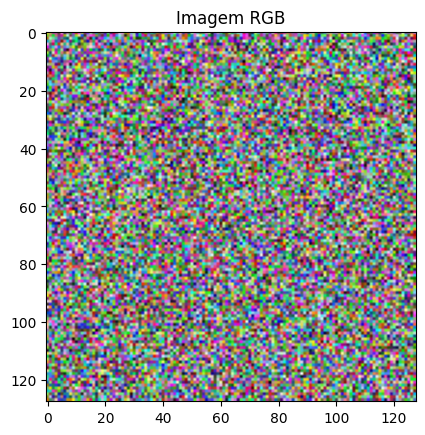

In [86]:
# Mostrando imagem desse tensor
import matplotlib.pyplot as plt

plt.imshow(tensor_randint_rgb.numpy())
plt.title("Imagem RGB")
plt.show()


### Exercício 4: Operações Avançadas com Tensores

1. Dado o tensor `a = torch.tensor([1, 2, 3])` e `b = torch.tensor([[4], [5], [6]])`, calcule a soma de `a` e `b` usando broadcasting.
2. Dado o tensor `a = torch.tensor([1.0, 2.0, 3.0, 4.0])`, calcule a soma de todos os elementos.
3. Dado o tensor `a = torch.tensor([1.0, 2.0, 3.0, 4.0])`, calcule a média de todos os elementos.
4. Dado o tensor `a = torch.tensor([1.0, 2.0, 3.0, 4.0])`, calcule a raiz quadrada de todos os elementos.

In [87]:
# @title 1) Dado o tensor a = torch.tensor([1, 2, 3]) e b = torch.tensor([[4], [5], [6]]), calcule a soma de a e b usando broadcasting.

a = torch.tensor([1, 2, 3])
b = torch.tensor([[4], [5], [6]])
soma = a + b
print(soma)

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [88]:
# @title 2) Dado o tensor a = torch.tensor([1.0, 2.0, 3.0, 4.0]), calcule a soma de todos os elementos.

a = torch.tensor([1.0, 2.0, 3.0, 4.0])
soma = torch.sum(a)
print(soma)

tensor(10.)


In [89]:
# @title 3) Dado o tensor a = torch.tensor([1.0, 2.0, 3.0, 4.0]), calcule a média de todos os elementos.

a = torch.tensor([1.0, 2.0, 3.0, 4.0])
media = torch.mean(a)
print(media)

tensor(2.5000)


In [90]:
# @title 4) Dado o tensor a = torch.tensor([1.0, 2.0, 3.0, 4.0]), calcule a raiz quadrada de todos os elementos.

a = torch.tensor([1.0, 2.0, 3.0, 4.0])
raiz_quadrada = torch.sqrt(a)
print(raiz_quadrada)

tensor([1.0000, 1.4142, 1.7321, 2.0000])


### Exercício 5: Autograd e Backpropagation

1. Crie um tensor `x` com os valores `[2.0, 3.0]` e `requires_grad=True`. Calcule `y = x^2` e os gradientes.
2. Crie um tensor `x` com o valor `3.0` e `requires_grad=True`. Calcule `y = 2*x + 1` e o gradiente.
3. Crie um tensor `x` com os valores `[1.0, 2.0, 3.0]` e `requires_grad=True`. Calcule `y = x^3` e os gradientes.

In [93]:
# @title 1) Crie um tensor x com os valores [2.0, 3.0] e requires_grad=True. Calcule y = x^2 e os gradientes.

x = torch.tensor([2.0, 3.0], requires_grad=True)
y = x ** 2

# Calculando a soma porque a função backward tem uma saida escalar
y = torch.sum(y)

y.backward()
print(x.grad)

tensor([4., 6.])


In [94]:
# @title 2) Crie um tensor x com o valor 3.0 e requires_grad=True. Calcule y = 2*x + 1 e o gradiente.

x = torch.tensor(3.0, requires_grad=True)
y = 2 * x + 1

y.backward()
print(x.grad)

tensor(2.)


In [97]:
# @title 3) Crie um tensor x com os valores [1.0, 2.0, 3.0] e requires_grad=True. Calcule y = x^3 e os gradientes.

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x ** 3).sum()

#y = torch.sum(y)

y.backward()
print(x.grad)

tensor([ 3., 12., 27.])


### Exercício 6: Operações de Redução

1. Crie um tensor de forma (4, 5) contendo valores de 1 a 20 usando `torch.arange`. Em seguida, calcule a soma de todos os elementos do tensor.

2. Crie um tensor de forma (3, 4) com valores aleatórios entre 0 e 1 usando `torch.rand`. Calcule a média dos elementos ao longo do eixo 1 (colunas).

3. Crie um tensor de forma (5, 5) contendo valores espaçados igualmente de 0 a 24 usando `torch.linspace`. Encontre o valor mínimo e o máximo de todos os elementos do tensor.

4. Crie um tensor de forma (3, 6) com valores inteiros aleatórios entre 10 e 50 usando `torch.randint`. Calcule o produto dos elementos ao longo do eixo 0 (linhas).

5. Crie um tensor de forma (2, 3, 4) com valores aleatórios entre 0 e 1 usando `torch.rand`. Encontre a soma dos elementos ao longo do eixo 2.

In [101]:
# @title 1) Crie um tensor de forma (4, 5) contendo valores de 1 a 20 usando torch.arange. Em seguida, calcule a soma de todos os elementos do tensor.

tensor = torch.arange(1, 21).reshape(4, 5)
print(tensor)

soma = torch.sum(tensor)
print("\nSoma dos elementos: ",soma)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]])

Soma dos elementos:  tensor(210)


In [103]:
# @title 2) Crie um tensor de forma (3, 4) com valores aleatórios entre 0 e 1 usando torch.rand. Calcule a média dos elementos ao longo do eixo 1 (colunas).

tensor = torch.rand(3, 4)
print(tensor)

media = torch.mean(tensor, dim=1)
print("\nMédia dos elementos ao longo do eixo 1 (colunas): ",media)

tensor([[0.9660, 0.0728, 0.8880, 0.4887],
        [0.0627, 0.7895, 0.4438, 0.8165],
        [0.0492, 0.5604, 0.9725, 0.9401]])

Média dos elementos ao longo do eixo 1 (colunas):  tensor([0.6039, 0.5281, 0.6305])


In [107]:
# @title 3) Crie um tensor de forma (5, 5) contendo valores espaçados igualmente de 0 a 24 usando torch.linspace. Encontre o valor mínimo e o máximo de todos os elementos do tensor.

tensor = torch.linspace(0, 24, steps=5*5).reshape(5, 5)
print(tensor)

minimo = torch.min(tensor)
maximo = torch.max(tensor)

print("\nValor mínimo: ",minimo)
print("\nValor máximo: ",maximo)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

Valor mínimo:  tensor(0.)

Valor máximo:  tensor(24.)


In [110]:
# @title 4) Crie um tensor de forma (3, 6) com valores inteiros aleatórios entre 10 e 50 usando torch.randint. Calcule o produto dos elementos ao longo do eixo 0 (linhas).

tensor = torch.randint(low=10, high=51, size=(3, 6))
print(tensor)

produto = torch.prod(tensor, dim=0)
print("\nProduto dos elementos ao longo do eixo 0 (linhas): ",produto)

tensor([[42, 28, 29, 27, 11, 48],
        [29, 14, 50, 34, 10, 49],
        [28, 26, 35, 28, 37, 11]])

Produto dos elementos ao longo do eixo 0 (linhas):  tensor([34104, 10192, 50750, 25704,  4070, 25872])


In [112]:
# @title 5) Crie um tensor de forma (2, 3, 4) com valores aleatórios entre 0 e 1 usando torch.rand. Encontre a soma dos elementos ao longo do eixo 2.

tensor = torch.rand(2, 3, 4)
print(tensor)

soma = torch.sum(tensor, dim=2)
print("\nSoma dos elementos ao longo do eixo 2: ",soma)

tensor([[[0.2930, 0.6198, 0.4109, 0.7215],
         [0.2689, 0.3860, 0.0029, 0.6027],
         [0.0876, 0.1614, 0.3587, 0.3308]],

        [[0.4645, 0.2717, 0.3523, 0.8855],
         [0.2043, 0.8486, 0.9575, 0.9671],
         [0.5133, 0.8816, 0.9976, 0.7747]]])

Soma dos elementos ao longo do eixo 2:  tensor([[2.0451, 1.2606, 0.9385],
        [1.9740, 2.9776, 3.1671]])


In [117]:
# Outra forma
tensor = torch.rand(2, 3, 4).sum(dim=2)
print(tensor)



tensor([[3.2079, 2.6626, 2.6048],
        [1.9324, 2.0720, 3.5022]])
